## Connect with the GoogleDrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import all the modules

In [2]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import json
import tensorflow.keras as keras
import tensorflow.keras.optimizers as optimizers
from sklearn.utils import shuffle
import librosa

# Load training HW data and assign labels for each data sample (`[1]`)

In [3]:
audio_dir = r'/content/drive/MyDrive/project_updated_without_artifact/Training_Audio_Files/HW'

training_images_HW = []
training_images_HW_dB = []
count = 0

for audio_file in os.listdir(audio_dir):
    count = count + 1
    print(f"The data sample {audio_file} is processed: {count}/{len(os.listdir(audio_dir))}")
    audio_path = os.path.join(audio_dir, audio_file)
    audio, sr = librosa.load(audio_path, sr=6000)

    # Mel
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, win_length=2048, n_mels=64, power=1, center=False) # I think he was using 128 as default
    S_dB = 20 * np.log10(spectrogram + 1e-6)
    training_images_HW_dB.append(S_dB)
    spectrogram = np.concatenate((spectrogram, spectrogram), axis=1)
    mel_pcen = librosa.pcen(spectrogram*(2**31), sr=sr, hop_length=512, gain=9.99686079e-01, bias=3.17143741e+00, power=3.22058271e-01, time_constant=2.51005792e-03, eps=5.09658383e-07, max_size=1)
    mel_pcen = mel_pcen[:, mel_pcen.shape[1]//2:]
    training_images_HW.append(mel_pcen)

#training_images_HW = np.asarray(training_images_HW_dB)
training_images_HW = np.asarray(training_images_HW)
training_labels_HW = np.ones(training_images_HW.shape[0])

The data sample 540A80D5_140.wav is processed: 1/355
The data sample 53DEAAF5_20.wav is processed: 2/355
The data sample 53FCDDD1_200.wav is processed: 3/355
The data sample 540A13D9_250.wav is processed: 4/355
The data sample 53D81E01_200.wav is processed: 5/355
The data sample 53F14DA9_250.wav is processed: 6/355
The data sample 540F332D_250.wav is processed: 7/355
The data sample 540BC445_0.wav is processed: 8/355
The data sample 539A00D4_200.wav is processed: 9/355
The data sample 53FAE396_60.wav is processed: 10/355
The data sample 539C7D29_0.wav is processed: 11/355
The data sample 53E94889_50.wav is processed: 12/355
The data sample 53D81E01_250.wav is processed: 13/355
The data sample 539ED2D2_200.wav is processed: 14/355
The data sample 540FCDDD_40.wav is processed: 15/355
The data sample 53FAF1A1_280.wav is processed: 16/355
The data sample 53E63C1F_200.wav is processed: 17/355
The data sample 539C7D29_50.wav is processed: 18/355
The data sample 5398C46C_280.wav is processed:

# Load training NoHW data and assign labels for each data sample (`[0]`)

In [4]:
audio_dir = r'/content/drive/MyDrive/project_updated_without_artifact/Training_Audio_Files/NoHW'

training_images_NoHW = []
training_images_NoHW_dB = []
count = 0

for audio_file in os.listdir(audio_dir):
    count = count + 1
    print(f"The data sample {audio_file} is processed: {count}/{len(os.listdir(audio_dir))}")
    audio_path = os.path.join(audio_dir, audio_file)
    audio, sr = librosa.load(audio_path, sr=6000)

    # Mel
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, win_length=2048, n_mels=64, power=1, center=False) # I think he was using 128 as default
    S_dB = 20 * np.log10(spectrogram + 1e-6)
    training_images_NoHW_dB.append(S_dB)
    spectrogram = np.concatenate((spectrogram, spectrogram), axis=1)
    mel_pcen = librosa.pcen(spectrogram*(2**31), sr=sr, hop_length=512, gain=9.99686079e-01, bias=3.17143741e+00, power=3.22058271e-01, time_constant=2.51005792e-03, eps=5.09658383e-07, max_size=1)
    mel_pcen = mel_pcen[:, mel_pcen.shape[1]//2:]
    training_images_NoHW.append(mel_pcen)

#training_images_NoHW = np.asarray(training_images_NoHW_dB)
training_images_NoHW = np.asarray(training_images_NoHW)
training_labels_NoHW = np.zeros(training_images_NoHW.shape[0])

The data sample 531A37F8_70.wav is processed: 1/310
The data sample 53010BCD_80.wav is processed: 2/310
The data sample 530120E6_280.wav is processed: 3/310
The data sample 52BF9F5D_230.wav is processed: 4/310
The data sample 533952D6_50.wav is processed: 5/310
The data sample 52F317ED_30.wav is processed: 6/310
The data sample 532A6C62_100.wav is processed: 7/310
The data sample 531ED531_190.wav is processed: 8/310
The data sample 532B740E_50.wav is processed: 9/310
The data sample 5338C635_100.wav is processed: 10/310
The data sample 53430F69_210.wav is processed: 11/310
The data sample 53430F69_270.wav is processed: 12/310
The data sample 5306DE6D_120.wav is processed: 13/310
The data sample 53010BCD_0.wav is processed: 14/310
The data sample 53395659_210.wav is processed: 15/310
The data sample 52CEE4BD_100.wav is processed: 16/310
The data sample 532D2479_150.wav is processed: 17/310
The data sample 52CEE4BD_0.wav is processed: 18/310
The data sample 5319A448_70.wav is processed: 

In [5]:
training_data = np.concatenate((training_images_HW, training_images_NoHW), axis=0)
training_labels = np.concatenate((training_labels_HW, training_labels_NoHW), axis=0)

In [6]:
training_data, training_labels = shuffle(training_data, training_labels, random_state=42)

In [7]:
training_data = (training_data-np.mean(training_data))/(np.std(training_data))

In [8]:
import gc
gc.collect()
del audio, mel_pcen, spectrogram, training_images_HW, training_images_NoHW, training_labels_HW, training_labels_NoHW
gc.collect()

0

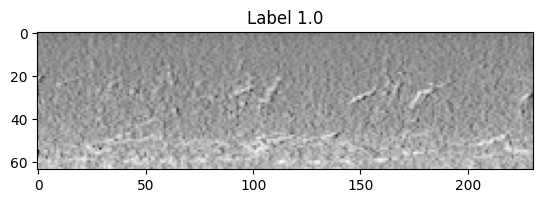

In [9]:
plt.figure()
plt.imshow(np.flipud(training_data[9]), cmap='gray')
plt.title(f'Label {training_labels[9]}')
plt.show()

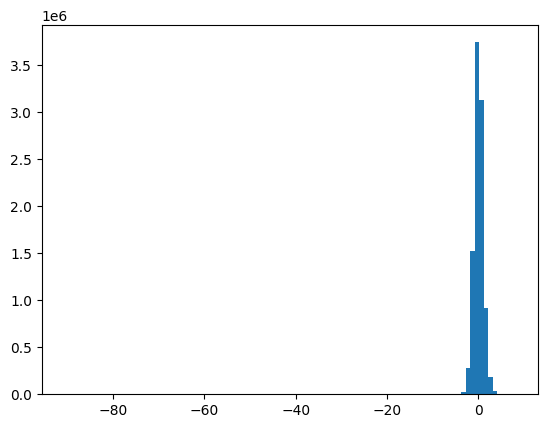

In [10]:
plt.figure()
plt.hist(np.reshape(training_data, -1), 100)
plt.show()

# Load validation HW data and assign labels for each data sample (`[1]`)

In [11]:
audio_dir = r'/content/drive/MyDrive/project_updated_without_artifact/Validation_Audio_Files/HW'

validation_images_HW = []
validation_images_HW_dB = []
count = 0

for audio_file in os.listdir(audio_dir):
    count = count + 1
    print(f"The data sample {audio_file} is processed: {count}/{len(os.listdir(audio_dir))}")
    audio_path = os.path.join(audio_dir, audio_file)
    audio, sr = librosa.load(audio_path, sr=6000)

    # Mel
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, win_length=2048, n_mels=64, power=1, center=False) # I think he was using 128 as default
    S_dB = 20 * np.log10(spectrogram + 1e-6)
    validation_images_HW_dB.append(S_dB)
    spectrogram = np.concatenate((spectrogram, spectrogram), axis=1)
    mel_pcen = librosa.pcen(spectrogram*(2**31), sr=sr, hop_length=512, gain=9.99686079e-01, bias=3.17143741e+00, power=3.22058271e-01, time_constant=2.51005792e-03, eps=5.09658383e-07, max_size=1)
    mel_pcen = mel_pcen[:, mel_pcen.shape[1]//2:]
    validation_images_HW.append(mel_pcen)

#validation_images_HW = np.asarray(validation_images_HW_dB)
validation_images_HW = np.asarray(validation_images_HW)
validation_labels_HW = np.ones(validation_images_HW.shape[0])

The data sample 53CF14B9_240.wav is processed: 1/100
The data sample 53C054F1_160.wav is processed: 2/100
The data sample 53F5A498_40.wav is processed: 3/100
The data sample 53CF14B9_200.wav is processed: 4/100
The data sample 53E94889_200.wav is processed: 5/100
The data sample 53C821D0_110.wav is processed: 6/100
The data sample 53BFCF59_0.wav is processed: 7/100
The data sample 53EECA4E_150.wav is processed: 8/100
The data sample 53ED8DE5_240.wav is processed: 9/100
The data sample 53BFCF59_110.wav is processed: 10/100
The data sample 53EECA4E_110.wav is processed: 11/100
The data sample 53B64781_100.wav is processed: 12/100
The data sample 53B64781_250.wav is processed: 13/100
The data sample 53B64781_70.wav is processed: 14/100
The data sample 53F9E9F5_50.wav is processed: 15/100
The data sample 53C821D0_220.wav is processed: 16/100
The data sample 53C821D0_260.wav is processed: 17/100
The data sample 53CF14B9_50.wav is processed: 18/100
The data sample 53E94889_250.wav is process

# Load validation NoHW data and assign labels for each data sample (`[0]`)

In [12]:
audio_dir = r'/content/drive/MyDrive/project_updated_without_artifact/Validation_Audio_Files/NoHW'
validation_images_NoHW =[]
validation_images_NoHW_dB = []
count = 0

for audio_file in os.listdir(audio_dir):
    count = count + 1
    print(f"The data sample {audio_file} is processed: {count}/{len(os.listdir(audio_dir))}")
    audio_path = os.path.join(audio_dir, audio_file)
    audio, sr = librosa.load(audio_path, sr=6000)

    # Mel
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, win_length=2048, n_mels=64, power=1, center=False) # I think he was using 128 as default
    S_dB = 20 * np.log10(spectrogram + 1e-6)
    validation_images_NoHW_dB.append(S_dB)
    spectrogram = np.concatenate((spectrogram, spectrogram), axis=1)
    mel_pcen = librosa.pcen(spectrogram*(2**31), sr=sr, hop_length=512, gain=9.99686079e-01, bias=3.17143741e+00, power=3.22058271e-01, time_constant=2.51005792e-03, eps=5.09658383e-07, max_size=1)
    mel_pcen = mel_pcen[:, mel_pcen.shape[1]//2:]
    validation_images_NoHW.append(mel_pcen)

#validation_images_NoHW = np.asarray(validation_images_NoHW_dB)
validation_images_NoHW = np.asarray(validation_images_NoHW)
validation_labels_NoHW = np.zeros(validation_images_NoHW.shape[0])

The data sample 52E04785_80.wav is processed: 1/100
The data sample 52DA8679_200.wav is processed: 2/100
The data sample 52B03DDE_100.wav is processed: 3/100
The data sample 52E899FD_230.wav is processed: 4/100
The data sample 52A1068E_100.wav is processed: 5/100
The data sample 52A41D90_0.wav is processed: 6/100
The data sample 52E5D759_140.wav is processed: 7/100
The data sample 52A2E4AD_80.wav is processed: 8/100
The data sample 52A2386A_10.wav is processed: 9/100
The data sample 530D2511_60.wav is processed: 10/100
The data sample 52A9984E_270.wav is processed: 11/100
The data sample 529E0825_180.wav is processed: 12/100
The data sample 530ACBE5_140.wav is processed: 13/100
The data sample 52ED3E45_170.wav is processed: 14/100
The data sample 52A34399_270.wav is processed: 15/100
The data sample 52DA8679_80.wav is processed: 16/100
The data sample 52EA079D_170.wav is processed: 17/100
The data sample 52DCB8F9_160.wav is processed: 18/100
The data sample 52E3B9F2_120.wav is processe

In [13]:
validation_data = np.concatenate((validation_images_HW, validation_images_NoHW), axis=0)
validation_labels = np.concatenate((validation_labels_HW, validation_labels_NoHW), axis=0)

In [14]:
validation_data, validation_labels = shuffle(validation_data, validation_labels, random_state=42)

In [15]:
validation_data = (validation_data-np.mean(validation_data))/(np.std(validation_data))

In [16]:
import gc
gc.collect()
del audio, mel_pcen, spectrogram, validation_images_HW, validation_labels_HW, validation_images_NoHW, validation_labels_NoHW
gc.collect()

0

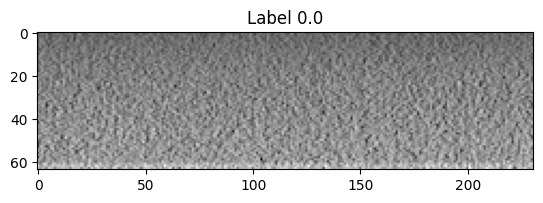

In [17]:
plt.figure()
plt.imshow(np.flipud(validation_data[4]), cmap='gray')
plt.title(f'Label {validation_labels[4]}')
plt.show()

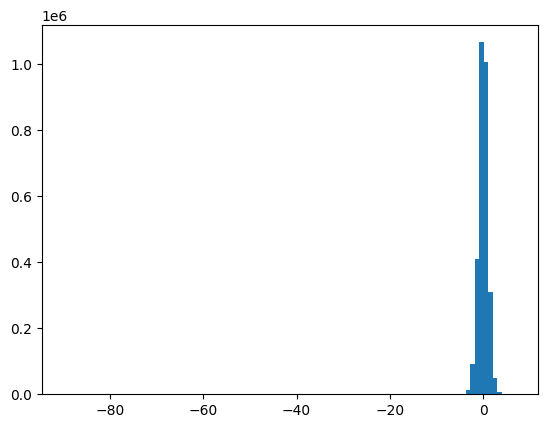

In [18]:
plt.figure()
plt.hist(np.reshape(validation_data, -1), 100)
plt.show()

## CNN Model

In [19]:
def model_scratch(input_shape=(64, 231, 1)):

  ########################## CNN model (Functional API)###############################
  ################################ Model Input #######################################
  model_input = keras.Input(shape=input_shape, name='model_input')
  ####################################################################################
  ####################################################################################
  ########################### First 2D Convolutional Layer ###########################
  model_conv_1 = keras.layers.Conv2D(filters= 32,
                                    kernel_size = (3,3),
                                    strides = (2,2),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_1'
                                    )(model_input)
  ####################################################################################
  ####################################################################################
  ########################## Second 2D Convolutional Layer ###########################
  model_conv_2 = keras.layers.Conv2D(64,
                                    kernel_size = (3,3),
                                    strides = (2,2),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_2'
                                    )(model_conv_1)
  batch_1 = keras.layers.BatchNormalization(name='bn_1')(model_conv_2)
  dropout_1 = keras.layers.Dropout(0.2, name='dropout1')(batch_1)
  ####################################################################################
  ####################################################################################
  ########################## Third 2D Convolutional Layer ############################
  model_conv_3 = keras.layers.Conv2D(128,
                                    kernel_size = (3,3),
                                    strides = (1,1),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_3'
                                    )(dropout_1)
  ####################################################################################
  ####################################################################################
  ########################## Fourth 2D Convolutional Layer ###########################
  model_conv_4 = keras.layers.Conv2D(128,
                                    kernel_size = (3,3),
                                    strides = (2,2),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_4'
                                    )(model_conv_3)
  batch_2 = keras.layers.BatchNormalization(name='bn_2')(model_conv_4)
  dropout_2 = keras.layers.Dropout(0.3, name='dropout2')(batch_2)
  ####################################################################################
  ####################################################################################
  ########################### Fifth 2D Convolutional Layer ###########################
  model_conv_5 = keras.layers.Conv2D(128,
                                    kernel_size = (3,3),
                                    strides = (1,1),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_5'
                                    )(dropout_2)
  ####################################################################################
  ####################################################################################
  ########################### Sixth 2D Convolutional Layer ###########################
  model_conv_6 = keras.layers.Conv2D(64,
                                    kernel_size = (3,3),
                                    strides = (2,2),
                                    activation='relu',
                                    padding='valid',
                                    name = 'conv_layer_6'
                                    )(model_conv_5)
  batch_3 = keras.layers.BatchNormalization(name='bn_3')(model_conv_6)
  ####################################################################################
  ####################################################################################
  ############################## Global Average Pooling ##############################
  gb_lay = keras.layers.GlobalAveragePooling2D(name='glob_av_pool')(batch_3)
  ####################################################################################
  ####################################################################################
  ############################ First Fully Connected Layer ###########################
  FC_1 = keras.layers.Dense(256,
                            activation='relu',
                            use_bias=True,
                            kernel_initializer='glorot_uniform',
                            bias_initializer='zeros',
                            name='FC1')(gb_lay)
  dropout_3 = keras.layers.Dropout(0.5, name='dropout3')(FC_1)
  ####################################################################################
  ####################################################################################
  ########################### Second Fully Connected Layer ###########################
  FC_2 = keras.layers.Dense(128,
                            activation='relu',
                            use_bias=True,
                            kernel_initializer='glorot_uniform',
                            bias_initializer='zeros',
                            name='FC2')(dropout_3)
  dropout_4 = keras.layers.Dropout(0.2, name='dropout4')(FC_2)
  ####################################################################################
  ####################################################################################
  ################################### Output Layer ###################################
  output_layer = keras.layers.Dense(1, activation='sigmoid')(dropout_4)
  ####################################################################################
  ####################################################################################
  ####################################### Model ######################################
  model_scratch = keras.models.Model(inputs=model_input, outputs=output_layer)
  return model_scratch

In [20]:
model = model_scratch(input_shape=(64, 231, 1))

In [21]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ model_input (InputLayer)             │ (None, 64, 231, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_1 (Conv2D)                │ (None, 31, 115, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 15, 57, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_1 (BatchNormalization)            │ (None, 15, 57, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout1 (Dropout)                   │ (None, 15, 57, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_3 (Conv2D)                │ (None, 13, 55, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_4 (Conv2D)                │ (None, 6, 27, 128)          │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_2 (BatchNormalization)            │ (None, 6, 27, 128)          │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout2 (Dropout)                   │ (None, 6, 27, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_5 (Conv2D)                │ (None, 4, 25, 128)          │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_6 (Conv2D)                │ (None, 1, 12, 64)           │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_3 (BatchNormalization)            │ (None, 1, 12, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ glob_av_pool                         │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout3 (Dropout)                   │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC2 (Dense)                          │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout4 (Dropout)                   │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 512,321 (1.95 MB)

 Trainable params: 511,809 (1.95 MB)

 Non-trainable params: 512 (2.00 KB)

## Compile the Model

In [22]:
def compiling(model,
              optimizer='adam',
              learning_rate=0.001,
              decaying=True):

    if decaying==True:
        initial_learning_rate = learning_rate
        lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate,
                                                                   decay_steps=90,
                                                                  decay_rate=0.75,
                                                                  staircase=True)

        if optimizer=='adam':
            optimizer = optimizers.Adam(learning_rate=lr_schedule)
        elif optimizer=='adagrad':
            optimizer = optimizers.Adagrad(learning_rate=lr_schedule)
        elif optimizer=='rmsprop':
            optimizer = optimizers.RMSprop(learning_rate=lr_schedule)
        elif optimizer=='adamax':
            optimizer = optimizers.Adamax(learning_rate=lr_schedule)
        else:
            raise ValueError("Please enter a valid optimizer")
        loss_fn = keras.losses.BinaryCrossentropy()
        model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    else:
        if optimizer=='adam':
            optimizer = optimizers.Adam(learning_rate=learning_rate)
        elif optimizer=='adagrad':
            optimizer = optimizers.Adagrad(learning_rate=learning_rate)
        elif optimizer=='rmsprop':
            optimizer = optimizers.RMSprop(learning_rate=learning_rate)
        elif optimizer=='adamax':
            optimizer = optimizers.Adamax(learning_rate=learning_rate)
        else:
            raise ValueError("Please enter a valid optimizer")

        loss_fn = keras.losses.BinaryCrossentropy()
        model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [23]:
compiling(model, optimizer='adam', learning_rate=0.001, decaying=True)

## Train the Model

In [24]:
training_data = training_data[:,:,:,np.newaxis]
validation_data = validation_data[:,:,:,np.newaxis]

In [25]:
history = model.fit(training_data, training_labels, batch_size=32, epochs=100, validation_data=(validation_data, validation_labels), verbose = 1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 451ms/step - accuracy: 0.5938 - loss: 0.6532 - val_accuracy: 0.6050 - val_loss: 0.6668
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7834 - loss: 0.4480 - val_accuracy: 0.5950 - val_loss: 0.6403
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8456 - loss: 0.3203 - val_accuracy: 0.5950 - val_loss: 0.6301
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9163 - loss: 0.2092 - val_accuracy: 0.5050 - val_loss: 1.1806
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9608 - loss: 0.1091 - val_accuracy: 0.5450 - val_loss: 1.0450
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0683 - val_accuracy: 0.5250 - val_loss: 1.1594
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9746 - loss: 0.0800 - val_accuracy: 0.7050 - val_loss: 0.5321
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9719 - loss: 0.0708 - val_accuracy: 

# Save

In [26]:
from tensorflow.keras.models import model_from_json
# Save model after training finished (see for more details,
# see: https://github.com/aaolcay/save_load_NN_model)
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/project_updated_without_artifact/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/project_updated_without_artifact/model.weights.h5")
print("Saved model to disk")

Saved model to disk


# Load

In [27]:
json_file = open('/content/drive/MyDrive/project_updated_without_artifact/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/project_updated_without_artifact/model.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [28]:
predicted_labels = loaded_model.predict(validation_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


In [29]:
predicted_labels[predicted_labels>=0.5] = 1
predicted_labels[predicted_labels<0.5] = 0
predicted_labels = predicted_labels[:,0]
a = predicted_labels==validation_labels
len(np.where(a==True)[0])/validation_labels.shape[0]

0.86